In [ ]:
# Install necessary libraries
!pip install tensorflow keras matplotlib
!pip install opencv-python

In [ ]:
# Import required libraries
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
dataset_dir = r'C:\Users\ZBook\Downloads\Our Images Modified'

train_dir = 'C:/Users/ZBook/Downloads/Train_Dataset/'
val_dir = 'C:/Users/ZBook/Downloads/Validation_Dataset/'

# Create the directories for the train and validation sets if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Iterate through each class directory in your dataset
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        continue

    # Create class subdirectories inside the train and validation directories
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Get all image files in the class directory
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Split the data into train and validation sets (80% train, 20% validation)
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # Move the files to the corresponding directories
    for file in train_files:
        shutil.move(os.path.join(class_path, file), os.path.join(train_class_dir, file))

    for file in val_files:
        shutil.move(os.path.join(class_path, file), os.path.join(val_class_dir, file))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
# Check if the train directory exists
if os.path.exists(train_dir):
    print(f"Training directory exists: {train_dir}")
    print("Contents of the training directory:")
    # List the files and subdirectories inside the train directory
    print(os.listdir(train_dir))
else:
    print(f"Training directory does not exist: {train_dir}")

# Check if the validation directory exists
if os.path.exists(val_dir):
    print(f"Validation directory exists: {val_dir}")
    print("Contents of the validation directory:")
    # List the files and subdirectories inside the validation directory
    print(os.listdir(val_dir))
else:
    print(f"Validation directory does not exist: {val_dir}")

Training directory exists: C:/Users/ZBook/Downloads/Train_Dataset/
Contents of the training directory:
['Amina', 'Asser', 'Fathy', 'Masry', 'Shrief', 'ziad']
Validation directory exists: C:/Users/ZBook/Downloads/Validation_Dataset/
Contents of the validation directory:
['Amina', 'Asser', 'Fathy', 'Masry', 'Shrief', 'ziad']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize images
    rotation_range=20,           # Random rotations
    width_shift_range=0.2,       # Random horizontal shifts
    height_shift_range=0.2,      # Random vertical shifts
    shear_range=0.2,             # Random shearing
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flips
    fill_mode='nearest'          # Fill mode for newly created pixels
)

# Data Augmentation for the validation set (only rescaling typically)
validation_datagen = ImageDataGenerator(
    rescale=1./255               # Normalize images
)

# Set up the data generators for the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),  # Resize images to the required input size for the model
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Checking the class labels from the generators
print("Class labels in the training data:", train_generator.class_indices)
print("Class labels in the validation data:", validation_generator.class_indices)


Found 618 images belonging to 6 classes.
Found 228 images belonging to 6 classes.
Class labels in the training data: {'Amina': 0, 'Asser': 1, 'Fathy': 2, 'Masry': 3, 'Shrief': 4, 'ziad': 5}
Class labels in the validation data: {'Amina': 0, 'Asser': 1, 'Fathy': 2, 'Masry': 3, 'Shrief': 4, 'ziad': 5}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer (increased depth)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Adding batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer with more neurons
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output Layer
model.add(Dense(6, activation='softmax'))  # 6 classes for the celebrities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

c:\Users\ZBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 253, 253, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    51,381,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,777,734 (197.52 MB)

 Trainable params: 51,776,774 (197.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set a specific learning rate
learning_rate = 1e-4
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[lr_scheduler]
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.7036 - loss: 5.6999 - val_accuracy: 0.2193 - val_loss: 43.9832 - learning_rate: 1.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.7329 - loss: 3.4614 - val_accuracy: 0.2237 - val_loss: 42.6734 - learning_rate: 1.0000e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.8124 - loss: 2.4292 - val_accuracy: 0.2675 - val_loss: 33.5372 - learning_rate: 1.0000e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8283 - loss: 3.0403 - val_accuracy: 0.2237 - val_loss: 36.2388 - learning_rate: 1.0000e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.8205 - loss: 2.1893 - val_accuracy: 0.2237 - val_loss: 39.6223 - learning_rate: 1.0000e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8118 - loss: 2.1046 - val_accuracy: 0.2500 - val_loss: 32.7748 - learning_rate: 1.0000e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.8127 -

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
model.save('trained_cnn_model_new.h5')

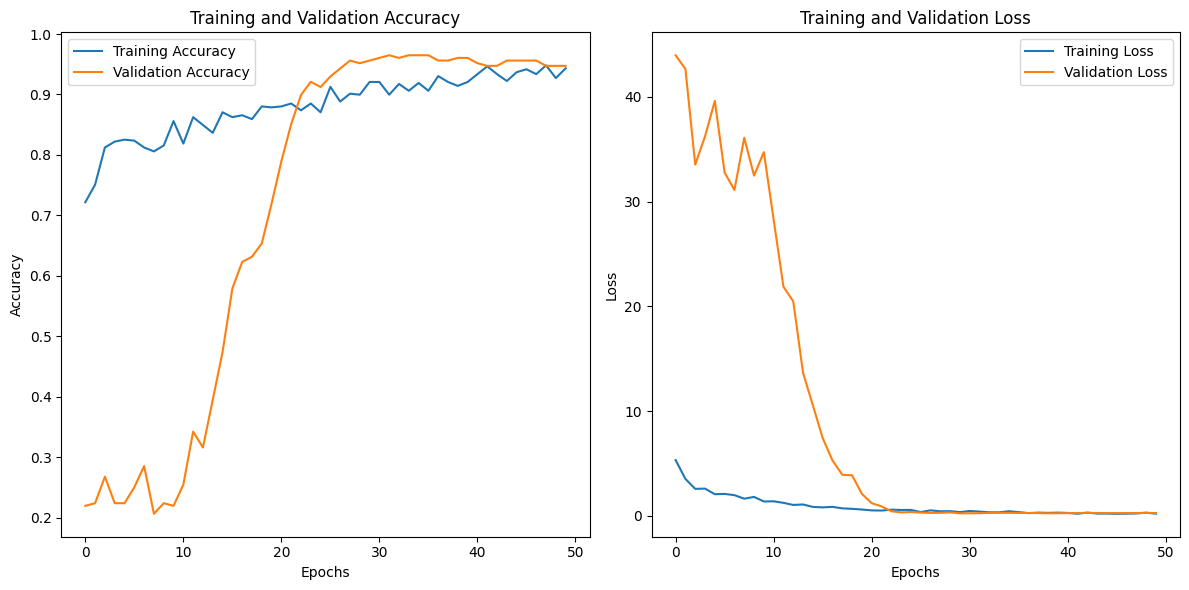

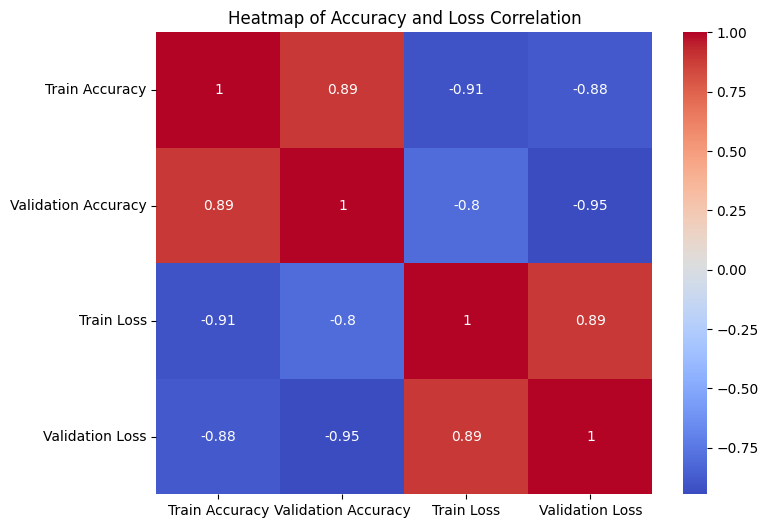

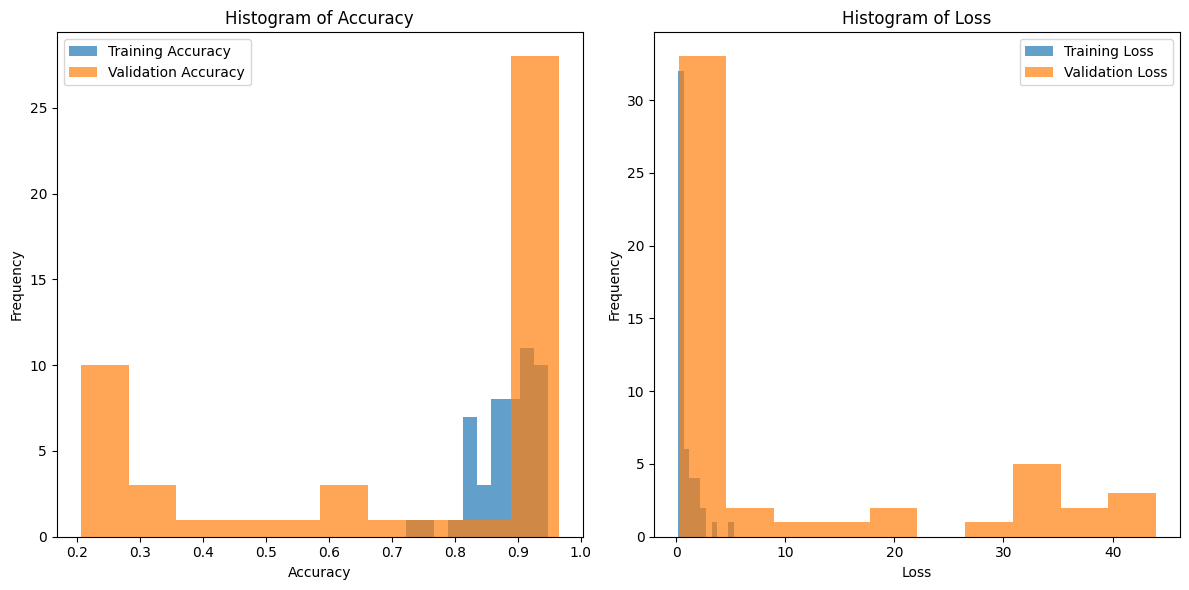

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Heatmap for Accuracy and Loss Correlation
# Convert accuracy and loss history to numpy arrays for correlation
accuracy = np.array([history.history['accuracy'], history.history['val_accuracy']])
loss = np.array([history.history['loss'], history.history['val_loss']])

# Create a heatmap of the accuracy and loss correlation
plt.figure(figsize=(8, 6))
sns.heatmap(np.corrcoef(accuracy, loss), annot=True, cmap='coolwarm', xticklabels=['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], yticklabels=['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'])
plt.title('Heatmap of Accuracy and Loss Correlation')
plt.show()

# Histogram for Accuracy and Loss distribution
plt.figure(figsize=(12, 6))

# Plot histogram for Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.hist(history.history['accuracy'], bins=10, alpha=0.7, label='Training Accuracy')
plt.hist(history.history['val_accuracy'], bins=10, alpha=0.7, label='Validation Accuracy')
plt.title('Histogram of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.hist(history.history['loss'], bins=10, alpha=0.7, label='Training Loss')
plt.hist(history.history['val_loss'], bins=10, alpha=0.7, label='Validation Loss')
plt.title('Histogram of Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9583 - loss: 0.2358
Validation Loss: 0.260662704706192
Validation Accuracy: 0.9473684430122375


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


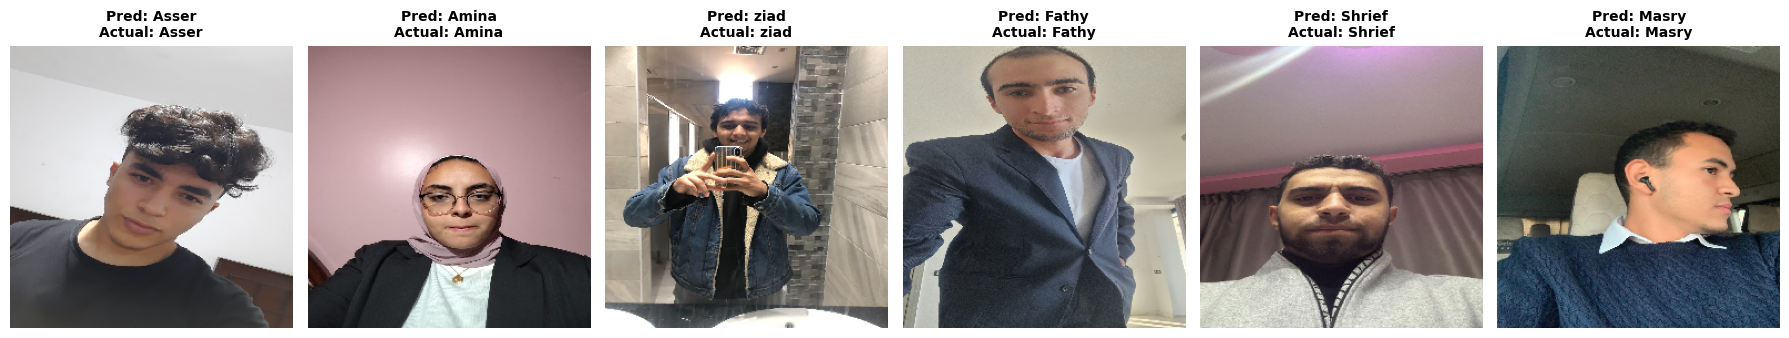

Classes in the dataset: ['Amina', 'Asser', 'Fathy', 'Masry', 'Shrief', 'ziad']


In [ ]:
# Ensure the 6 classes are represented with one example each
class_indices = validation_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Reverse dictionary to map index to class name

# Create a dictionary to store one image per class
class_images = {}
class_labels = {}

# Iterate over batches until we get one image per class
for _ in range(len(validation_generator)):
    images, labels = next(validation_generator)
    for img, label in zip(images, labels):
        class_index = np.argmax(label)
        if class_index not in class_images:  # Add only if the class is not already represented
            class_images[class_index] = img
            class_labels[class_index] = label
        if len(class_images) == len(class_indices):  # Stop once we have all classes
            break
    if len(class_images) == len(class_indices):  # Break outer loop as well
        break

# Display predictions and actual labels for the 6 unique classes
fig, axes = plt.subplots(1, 6, figsize=(18, 4))

for i, (class_index, ax) in enumerate(zip(class_images.keys(), axes)):
    # Get the image and label for this class
    image = class_images[class_index]
    label = class_labels[class_index]

    # Predict the class for this image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class_index = np.argmax(prediction)
    actual_class_index = class_index

    # Get class names
    predicted_name = class_names[predicted_class_index]
    actual_name = class_names[actual_class_index]

    # Display the image
    ax.imshow(image)
    ax.set_title(f'Pred: {predicted_name}\nActual: {actual_name}', fontsize=10, fontweight='bold')
    ax.axis('off')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Print the class names for reference
print("Classes in the dataset:", list(class_names.values()))
